In [10]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

In [11]:
warnings.filterwarnings("ignore")

In [13]:
# Veriyi okuma
df = pd.read_csv(r"C:\Users\tetik\Downloads\archive (3)\waterquality.csv")

# Eksik verilerin doldurulması
for i in df.columns[1:]:
    df[i] = df[i].fillna(df[i].median())
df.dropna(inplace=True)

# Tarihlerin ayrıştırılması
def convert_dates(x):
    date = datetime.strptime(x, "%Y-%m-%d")
    return [date.year, date.month]

df["Year"] = df["Date"].apply(lambda x: convert_dates(x)[0])
df["Month"] = df["Date"].apply(lambda x: convert_dates(x)[1])


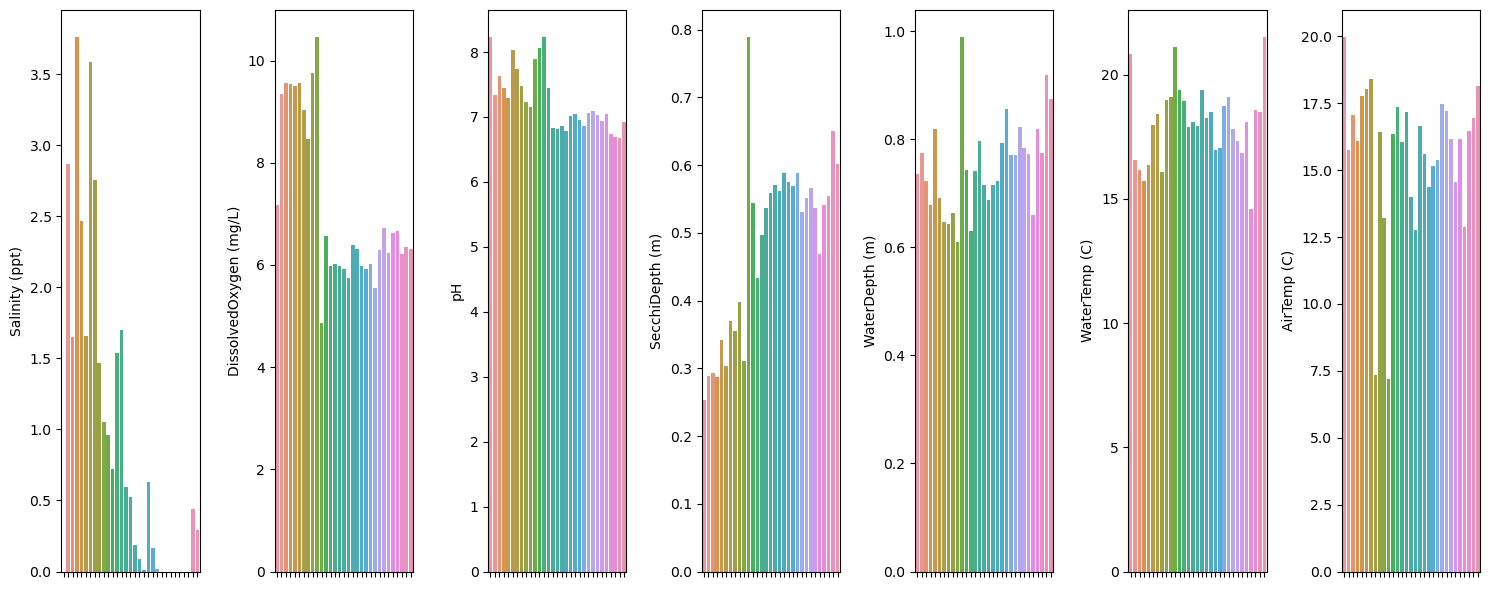

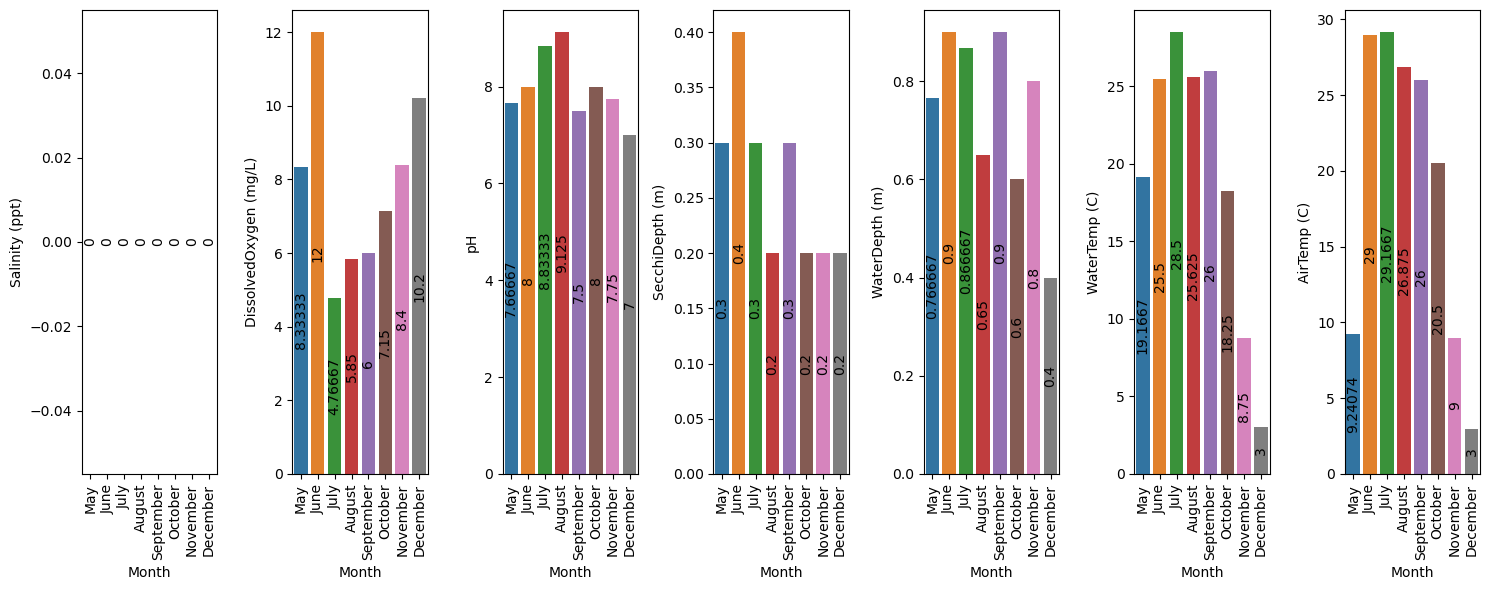

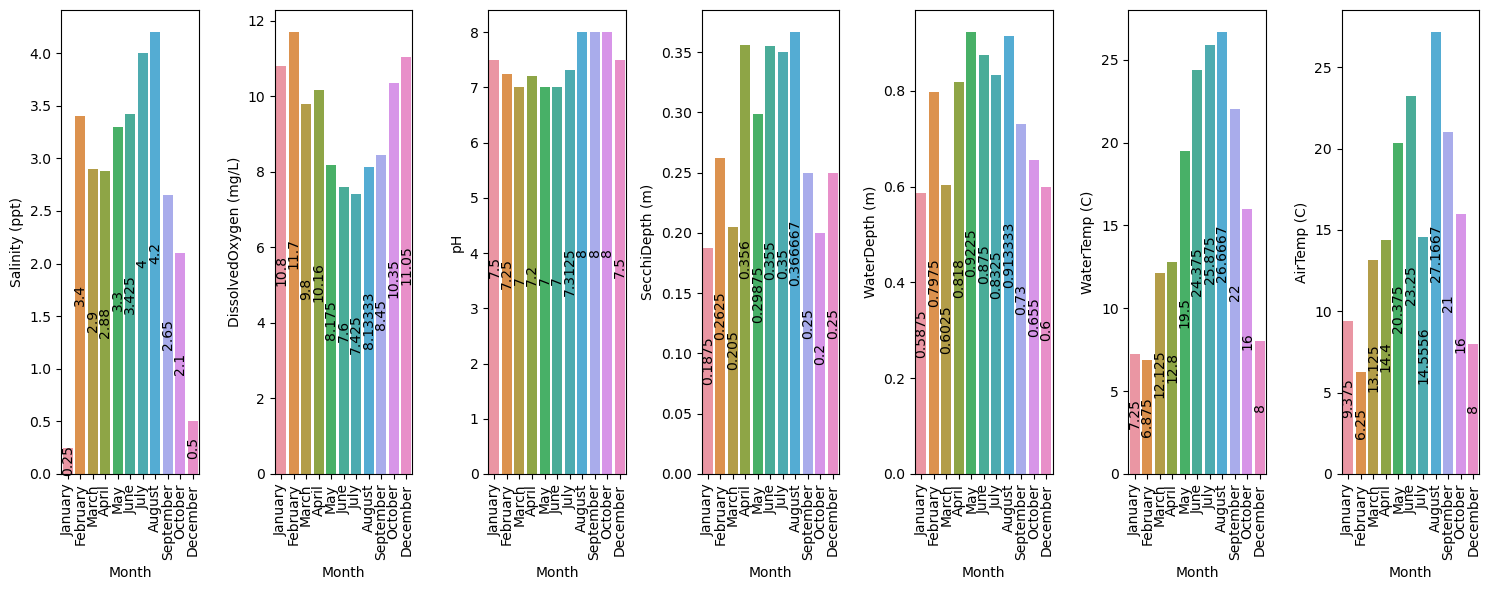

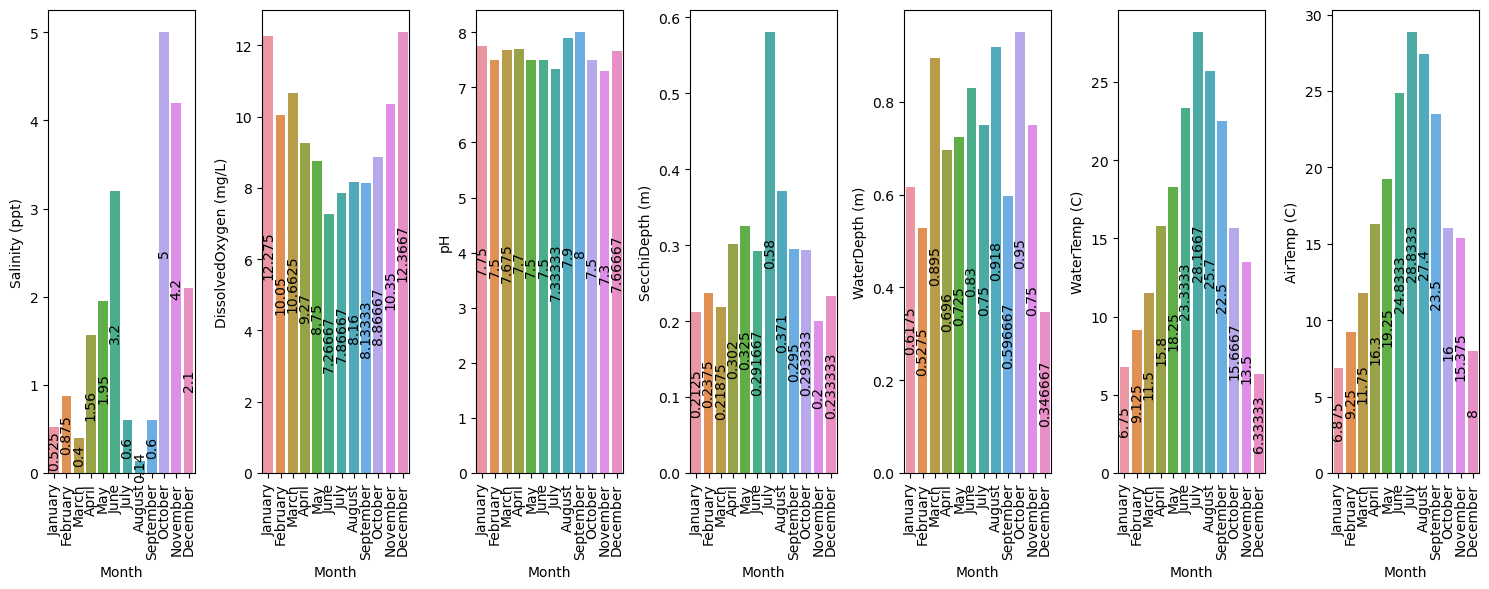

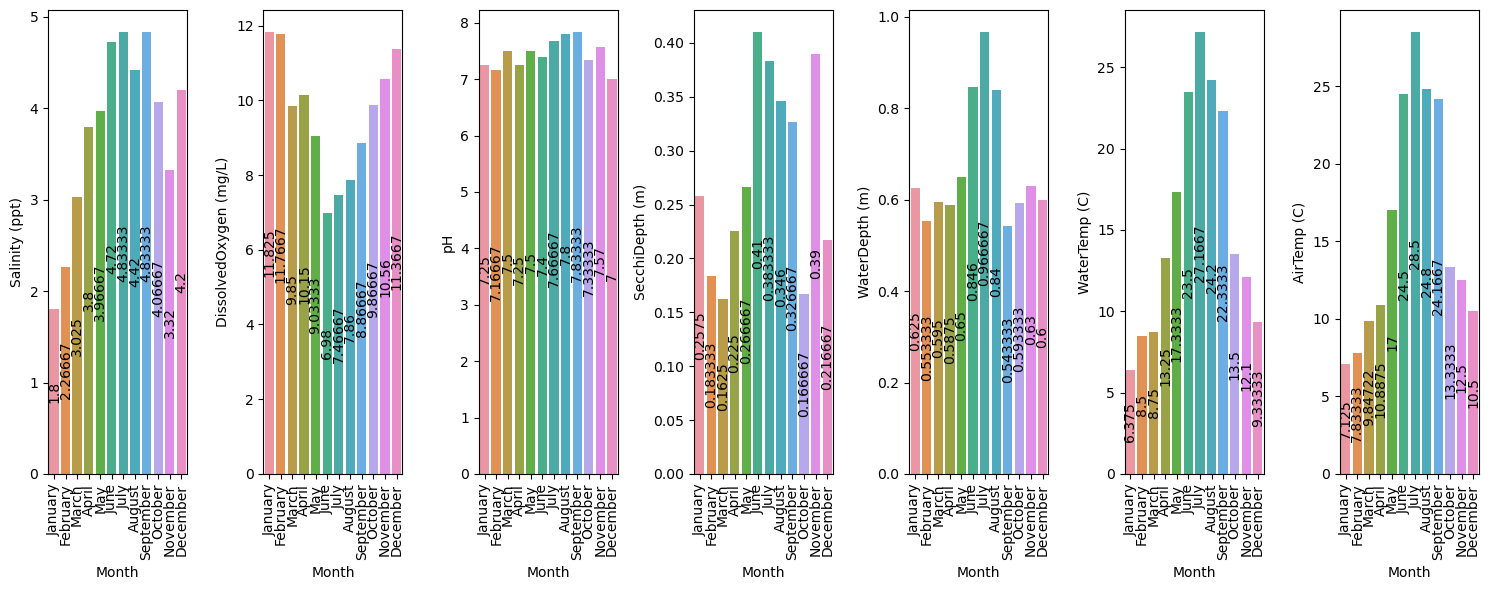

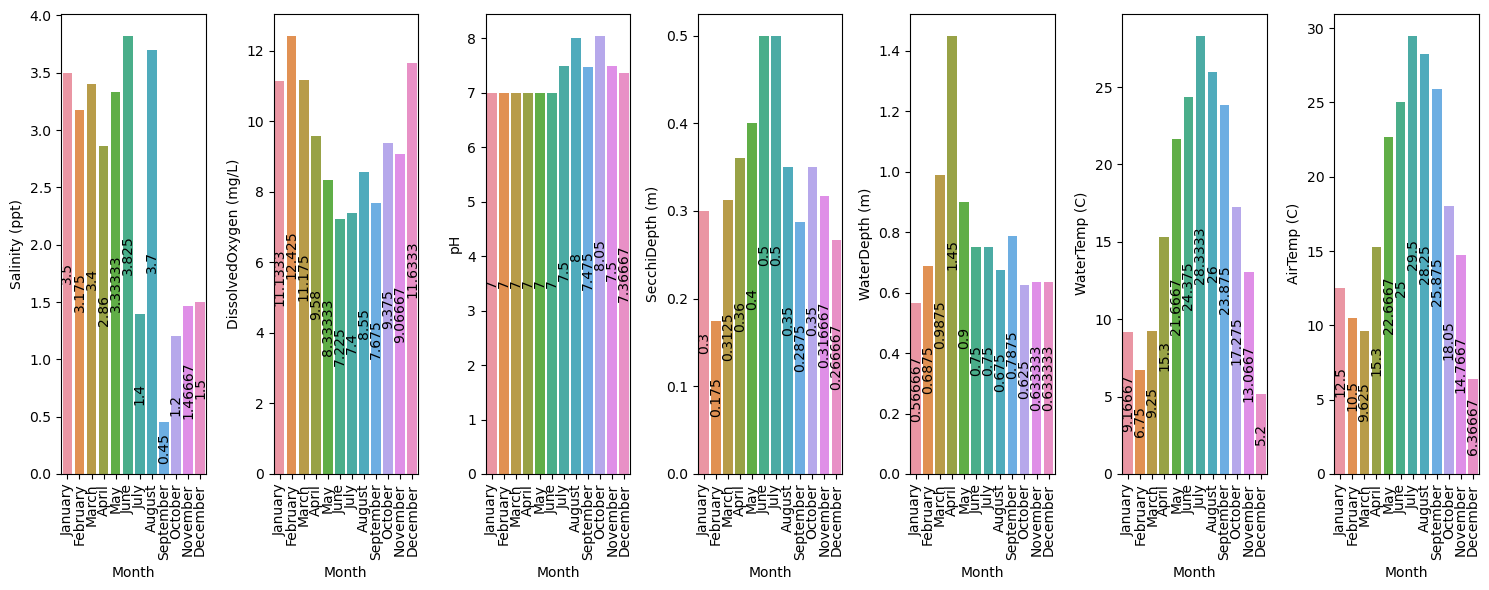

In [14]:
# Fonksiyonlar tanımlama (bar_label ve plots fonksiyonları)
def bar_label(axes, _type="edge", rotation=0):
    for container in axes.containers:
        axes.bar_label(container, label_type=_type, rotation=rotation)

months = ["January", "February", "March",
         "April", "May", "June",
         "July", "August", "September",
         "October", "November", "December"]

def plots(df, name, num, axes, month=False):
    grouped = df.groupby(name)
    mean = pd.DataFrame(grouped[num].mean())
    mean["id"] = mean.index.tolist()
    if month:
        for i in range(len(mean)):
            mean.iloc[i, 1] = months[mean.iloc[i, 1]-1]
    sns.barplot(x=mean.iloc[:, 1], y=mean.iloc[:, 0], ax=axes)

# Yıllık su kalitesi dağılımı görselleştirme
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))
for i, j in enumerate(df.columns[1:-2]):
    plots(df, "Year", j, axes[i])
    axes[i].set_xticklabels(())
    axes[i].set_xlabel("")
plt.tight_layout()
plt.show()

# Aylık su kalitesi dağılımı görselleştirme (ilk 5 yıl için)
years = df["Year"].unique()
years = sorted(years)

for i in years[:5]:
    display(HTML("<h2>Monthly water quality distribution for {}</h2>".format(i)))
    temp_df = df[df["Year"] == i]
    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))
    for j, k in enumerate(df.columns[1:-2]):
        plots(temp_df, "Month", k, axes[j], True)
        bar_label(axes[j], "center", 90)
        axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation=90)
        axes[j].set_xlabel("Month")
    plt.tight_layout()
    plt.show()


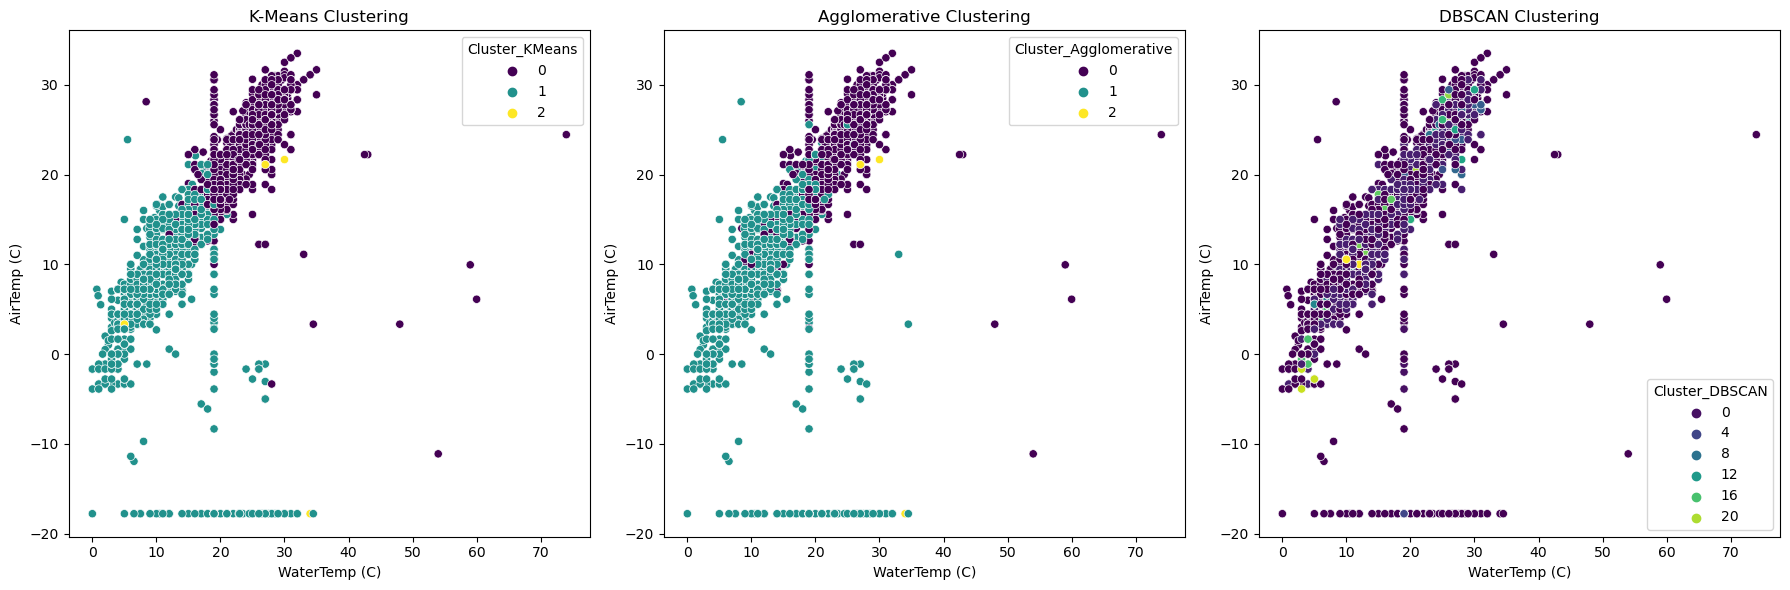

In [15]:
# Özellikleri ve veriyi hazırlama
features = df.columns[1:-2]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Farklı kümeleme algoritmalarının uygulanması ve en uygununun seçilmesi
def apply_clustering(df, algorithm, n_clusters):
    if algorithm == "KMeans":
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        df['Cluster_KMeans'] = kmeans.fit_predict(scaled_features)
    elif algorithm == "AgglomerativeClustering":
        agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
        df['Cluster_Agglomerative'] = agg_clustering.fit_predict(scaled_features)
    elif algorithm == "DBSCAN":
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        df['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_features)
    # Buraya başka kümeleme algoritmaları ekleyebilirsiniz

# Kümeleme algoritmalarının uygulanması
apply_clustering(df, algorithm="KMeans", n_clusters=3)
apply_clustering(df, algorithm="AgglomerativeClustering", n_clusters=3)
apply_clustering(df, algorithm="DBSCAN", n_clusters=3)  # DBSCAN için küme sayısı belirtilmez

# Sonuçların görselleştirilmesi
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='WaterTemp (C)', y='AirTemp (C)', hue='Cluster_KMeans', palette='viridis')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='WaterTemp (C)', y='AirTemp (C)', hue='Cluster_Agglomerative', palette='viridis')
plt.title('Agglomerative Clustering')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='WaterTemp (C)', y='AirTemp (C)', hue='Cluster_DBSCAN', palette='viridis')
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

